In [6]:
import pandas as pd

df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
print(df.Sex.value_counts(),
      df.BP.value_counts(), # Blood Pressure Levels
      df.Cholesterol.value_counts(),
      df.Drug.value_counts(),
      sep='\n'*2)

M    104
F     96
Name: Sex, dtype: int64

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

df_int = df.copy()
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    df_int[col] = LabelEncoder().fit_transform(df[col])
    print(col, df[col].unique(), '=>', df_int[col].unique())

Sex ['F' 'M'] => [0 1]
BP ['HIGH' 'LOW' 'NORMAL'] => [0 1 2]
Cholesterol ['HIGH' 'NORMAL'] => [0 1]
Drug ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB'] => [0 3 4 1 2]


In [12]:
from sklearn.model_selection import train_test_split

X = df_int[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
Y = df_int['Drug']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.33)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

X_train

(134, 5) (134,)
(66, 5) (66,)


,Age,Sex,BP,Cholesterol,Na_to_K
127,35,1,2,1,7.845
105,37,1,1,1,8.968
48,23,1,2,0,31.686
66,29,1,0,0,12.856
54,68,0,0,1,10.189
...,...,...,...,...,...
133,24,1,2,0,25.786
137,35,0,0,0,12.894
72,24,0,2,0,10.605
140,49,1,0,1,6.269


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train, Y_train)

print('SVM accuracy: ', svm.score(X_test, Y_test))
print('SVM confusion matrix:')
print(confusion_matrix(Y_test, svm.predict(X_test))) # x - prediction, y - actual
vec_lin = svm.support_vectors_

del svm

SVM accuracy:  0.9848484848484849
SVM confusion matrix:
[[28  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 22]]


In [14]:
svm_rbf = SVC(kernel='rbf', random_state=1)
svm_rbf.fit(X_train, Y_train)

print('SVM_rbf (rbf) accuracy: ', svm_rbf.score(X_test, Y_test))
print('SVM_rbf (rbf) confusion matrix:')
print(confusion_matrix(Y_test, svm_rbf.predict(X_test)))
vec_rbf = svm_rbf.support_vectors_

del svm_rbf

SVM_rbf (rbf) accuracy:  0.7424242424242424
SVM_rbf (rbf) confusion matrix:
[[28  0  0  0  0]
 [ 1  0  0  0  5]
 [ 0  0  0  0  6]
 [ 0  0  0  0  4]
 [ 1  0  0  0 21]]


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.01, 0.001, 0.0001]},
]

cv = GridSearchCV(estimator=SVC(random_state=1), param_grid=param_grid)
cv.fit(X, Y)

print(cv.best_estimator_)
print(cv.best_score_)
# print(cv.cv_results_['mean_test_score'])
# cv.cv_results_['params'][cv.best_index_]

del cv

SVC(C=1, kernel='linear', random_state=1)
0.99


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

print('Random forest accuracy: ', rf.score(X_test, Y_test))
print('Random forest confusion matrix:')
print(confusion_matrix(Y_test, rf.predict(X_test)))
# print(rf.max_depth)

Random forest accuracy:  0.9545454545454546
Random forest confusion matrix:
[[28  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  2  4  0  0]
 [ 0  0  0  3  1]
 [ 0  0  0  0 22]]


In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.01, 0.001, 0.0001]},
]

cv = GridSearchCV(estimator=SVC(random_state=1), param_grid=param_grid)
cv.fit(X, Y)

print(cv.best_estimator_)
print(cv.best_score_)

[8.37652699e-01 1.58821492e-01 2.03699655e-03 7.50867528e-04
 7.37945622e-04]


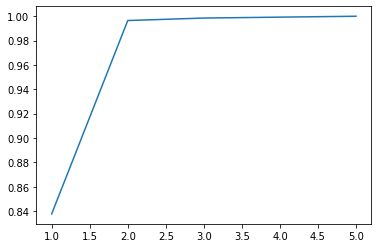

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)
# # f, ax = plt.subplots(figsize=(10,10))
plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), np.cumsum(pca.explained_variance_ratio_))

# np.cumsum(pca.explained_variance_ratio_)
# print(X.shape)
# print(pca.components_)
# print(pca.explained_variance_)


# projected_X = pca.fit_transform(X)
# projected_X



In [12]:
# reduced_X = pca.transform(X)
# X_train, X_test, Y_train, Y_test = train_test_split(reduced_X, Y)
# svm = SVC()
# svm.fit(X_train, Y_train)
# print('SVM accuracy: ', svm.score(X_test, Y_test))

SVM accuracy:  0.7575757575757576


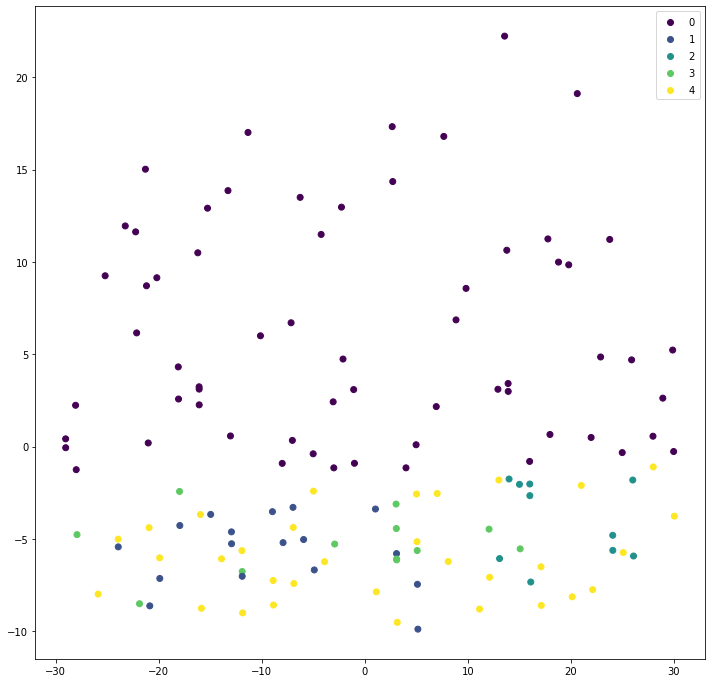

In [18]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
pca = PCA(n_components=2, random_state=1)
X_train_reduced = pca.fit_transform(X_train)

svm = SVC(C=1, kernel='linear', random_state=1)
svm.fit(X_train_reduced, Y_train)

X_test_reduced = pca.transform(X_test)
print('SVM accuracy: ', svm.score(X_test_reduced, Y_test))

fig, ax = plt.subplots(figsize=(12,12))
scatter = ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=Y_train)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels)
plt.show()

del pca
del svm

In [17]:
from sklearn.pipeline import Pipeline

pca = PCA(random_state=1)
svm = SVC(random_state=1)
pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])

param_grid = [
    {'pca__n_components': [1, 2, 3, 4], 'svm__C': [1, 10, 100, 1000], 'svm__kernel': ['linear']},
    {'pca__n_components': [1, 2, 3, 4], 'svm__C': [1, 10, 100, 1000], 'svm__kernel': ['rbf'], 'svm__gamma': [1, 0.01, 0.001, 0.0001]},
]

cv = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
cv.fit(X, Y)

print(cv.best_estimator_)
print(cv.best_score_)
# cv.cv_results_['params'][cv.best_index_]

Pipeline(steps=[('pca', PCA(n_components=3, random_state=1)),
                ('svm', SVC(C=1000, gamma=0.001, random_state=1))])
0.9199999999999999


SVM accuracy:  0.9090909090909091


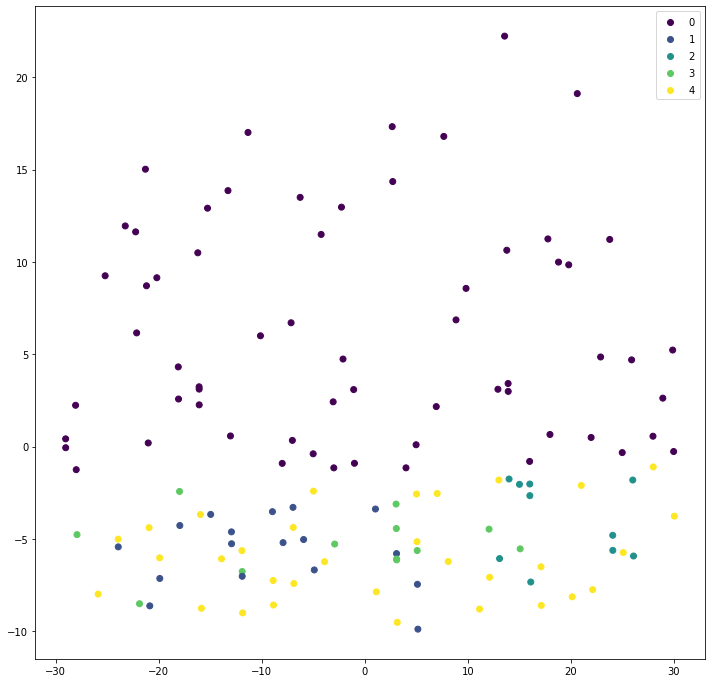

In [21]:
pca = PCA(n_components=3, random_state=1)
X_train_reduced = pca.fit_transform(X_train)

svm = SVC(C=1000, kernel='rbf', gamma=0.001, random_state=1)
svm.fit(X_train_reduced, Y_train)

X_test_reduced = pca.transform(X_test)
print('SVM accuracy: ', svm.score(X_test_reduced, Y_test))

fig, ax = plt.subplots(figsize=(12,12))
scatter = ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=Y_train)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels)
plt.show()

del pca
del svm

In [31]:
type(X_train_reduced)

numpy.ndarray

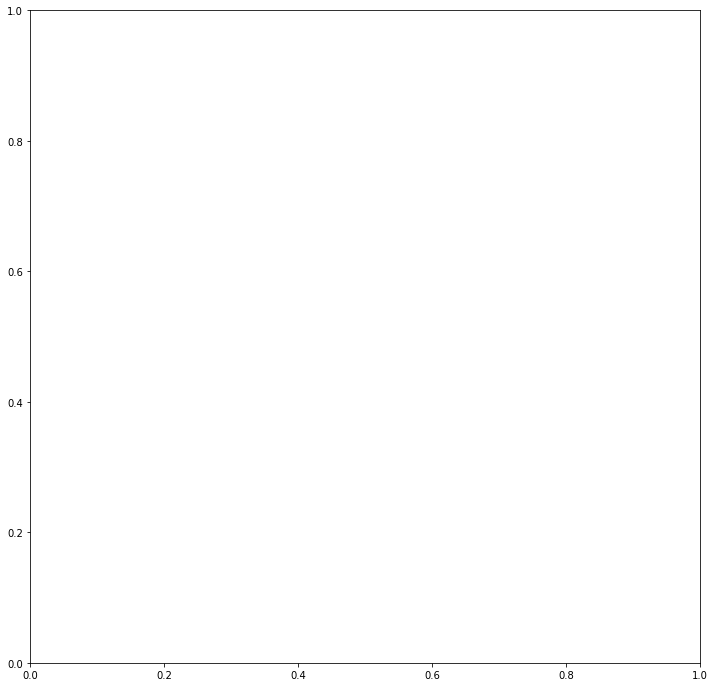

In [34]:
import plotly.express as px

ax.scatter_3d(x=X_train_reduced[:,0], y=X_train_reduced[:,1], z=X_train_reduced[:,2], color=Y_train)
fig.show()

In [15]:

"""
https://www.kaggle.com/philippurwokoap/svm-multiclass-classification
SVM: 0.7

https://www.kaggle.com/karanpatel219/drug-classification-100-random-forest
RF: 1.0 (?)
"""

'\nhttps://www.kaggle.com/philippurwokoap/svm-multiclass-classification\nSVM: 0.7\n\nhttps://www.kaggle.com/karanpatel219/drug-classification-100-random-forest\nRF: 1.0 (?)\n'